# Customer Segmentation for Credit Card Customers

## Project Overview

This project focuses on analyzing credit card usage data to identify distinct customer segments. The ultimate goal is to move beyond technical clustering to provide actionable business strategies that help target or support different customer groups effectively.

The analysis utilizes the Customer Segmentation - Credit Cards dataset , which can be found on [here](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata).

## Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import plotly.graph_objects as go
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Data Loading & Exploration

In [2]:
df = pd.read_csv("data\CC GENERAL.csv")
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

there is one missing value in `CREDIT_LIMIT` and we can drop it.

In [5]:
df = df[df['CREDIT_LIMIT'].notna()]

In [6]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8949.000000        8949.000000   8949.000000       8949.000000   
mean    1564.647593           0.877350   1003.316936        592.503572   
std     2081.584016           0.236798   2136.727848       1659.968851   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.365782           0.888889     39.800000          0.000000   
50%      873.680279           1.000000    361.490000         38.000000   
75%     2054.372848           1.000000   1110.170000        577.830000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8949.000000   8949.000000          8949.000000   
mean               411.113579    978.959616             0.490405   
std                904.378205   2097.264344             0.401360   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.650000   1113.868654             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8949.000000                       8949.000000   
mean                     0.202480                          0.364478   
std                      0.298345                          0.397451   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8949.000000       8949.000000    8949.000000   8949.000000   
mean                 0.135141          3.249078      14.711476   4494.449450   
std                  0.200132          6.824987      24.858552   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8949.000000       8636.000000       8949.000000  8949.000000  
mean    1733.336511        864.304943          0.153732    11.517935  
std     2895.168146       2372.566350          0.292511     1.337134  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.282850        169.163545          0.000000    12.000000  
50%      857.062706        312.452292          0.000000    12.000000  
75%     1901.279320        825.496463          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [7]:
# CUST_ID feature is unique for each customer so it doesn't give any information and we should drop it
df = df.drop(columns='CUST_ID')

In [8]:
discrete_features = []
continuous_features = []

for col in df.columns:
    unique_count = df[col].nunique()
    
    if unique_count <= 100:
        discrete_features.append(col)
    else:
        continuous_features.append(col)
        
    print(f'{col:33} : {df[col].nunique():6} : {df[col].dtype:}')

BALANCE                           :   8870 : float64
BALANCE_FREQUENCY                 :     43 : float64
PURCHASES                         :   6203 : float64
ONEOFF_PURCHASES                  :   4014 : float64
INSTALLMENTS_PURCHASES            :   4452 : float64
CASH_ADVANCE                      :   4322 : float64
PURCHASES_FREQUENCY               :     47 : float64
ONEOFF_PURCHASES_FREQUENCY        :     47 : float64
PURCHASES_INSTALLMENTS_FREQUENCY  :     47 : float64
CASH_ADVANCE_FREQUENCY            :     54 : float64
CASH_ADVANCE_TRX                  :     65 : int64
PURCHASES_TRX                     :    173 : int64
CREDIT_LIMIT                      :    205 : float64
PAYMENTS                          :   8710 : float64
MINIMUM_PAYMENTS                  :   8635 : float64
PRC_FULL_PAYMENT                  :     47 : float64
TENURE                            :      7 : int64


In [9]:
print(f"Discrete Features: {discrete_features}")
print(f"Continuous Features: {continuous_features}")

Discrete Features: ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PRC_FULL_PAYMENT', 'TENURE']
Continuous Features: ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']


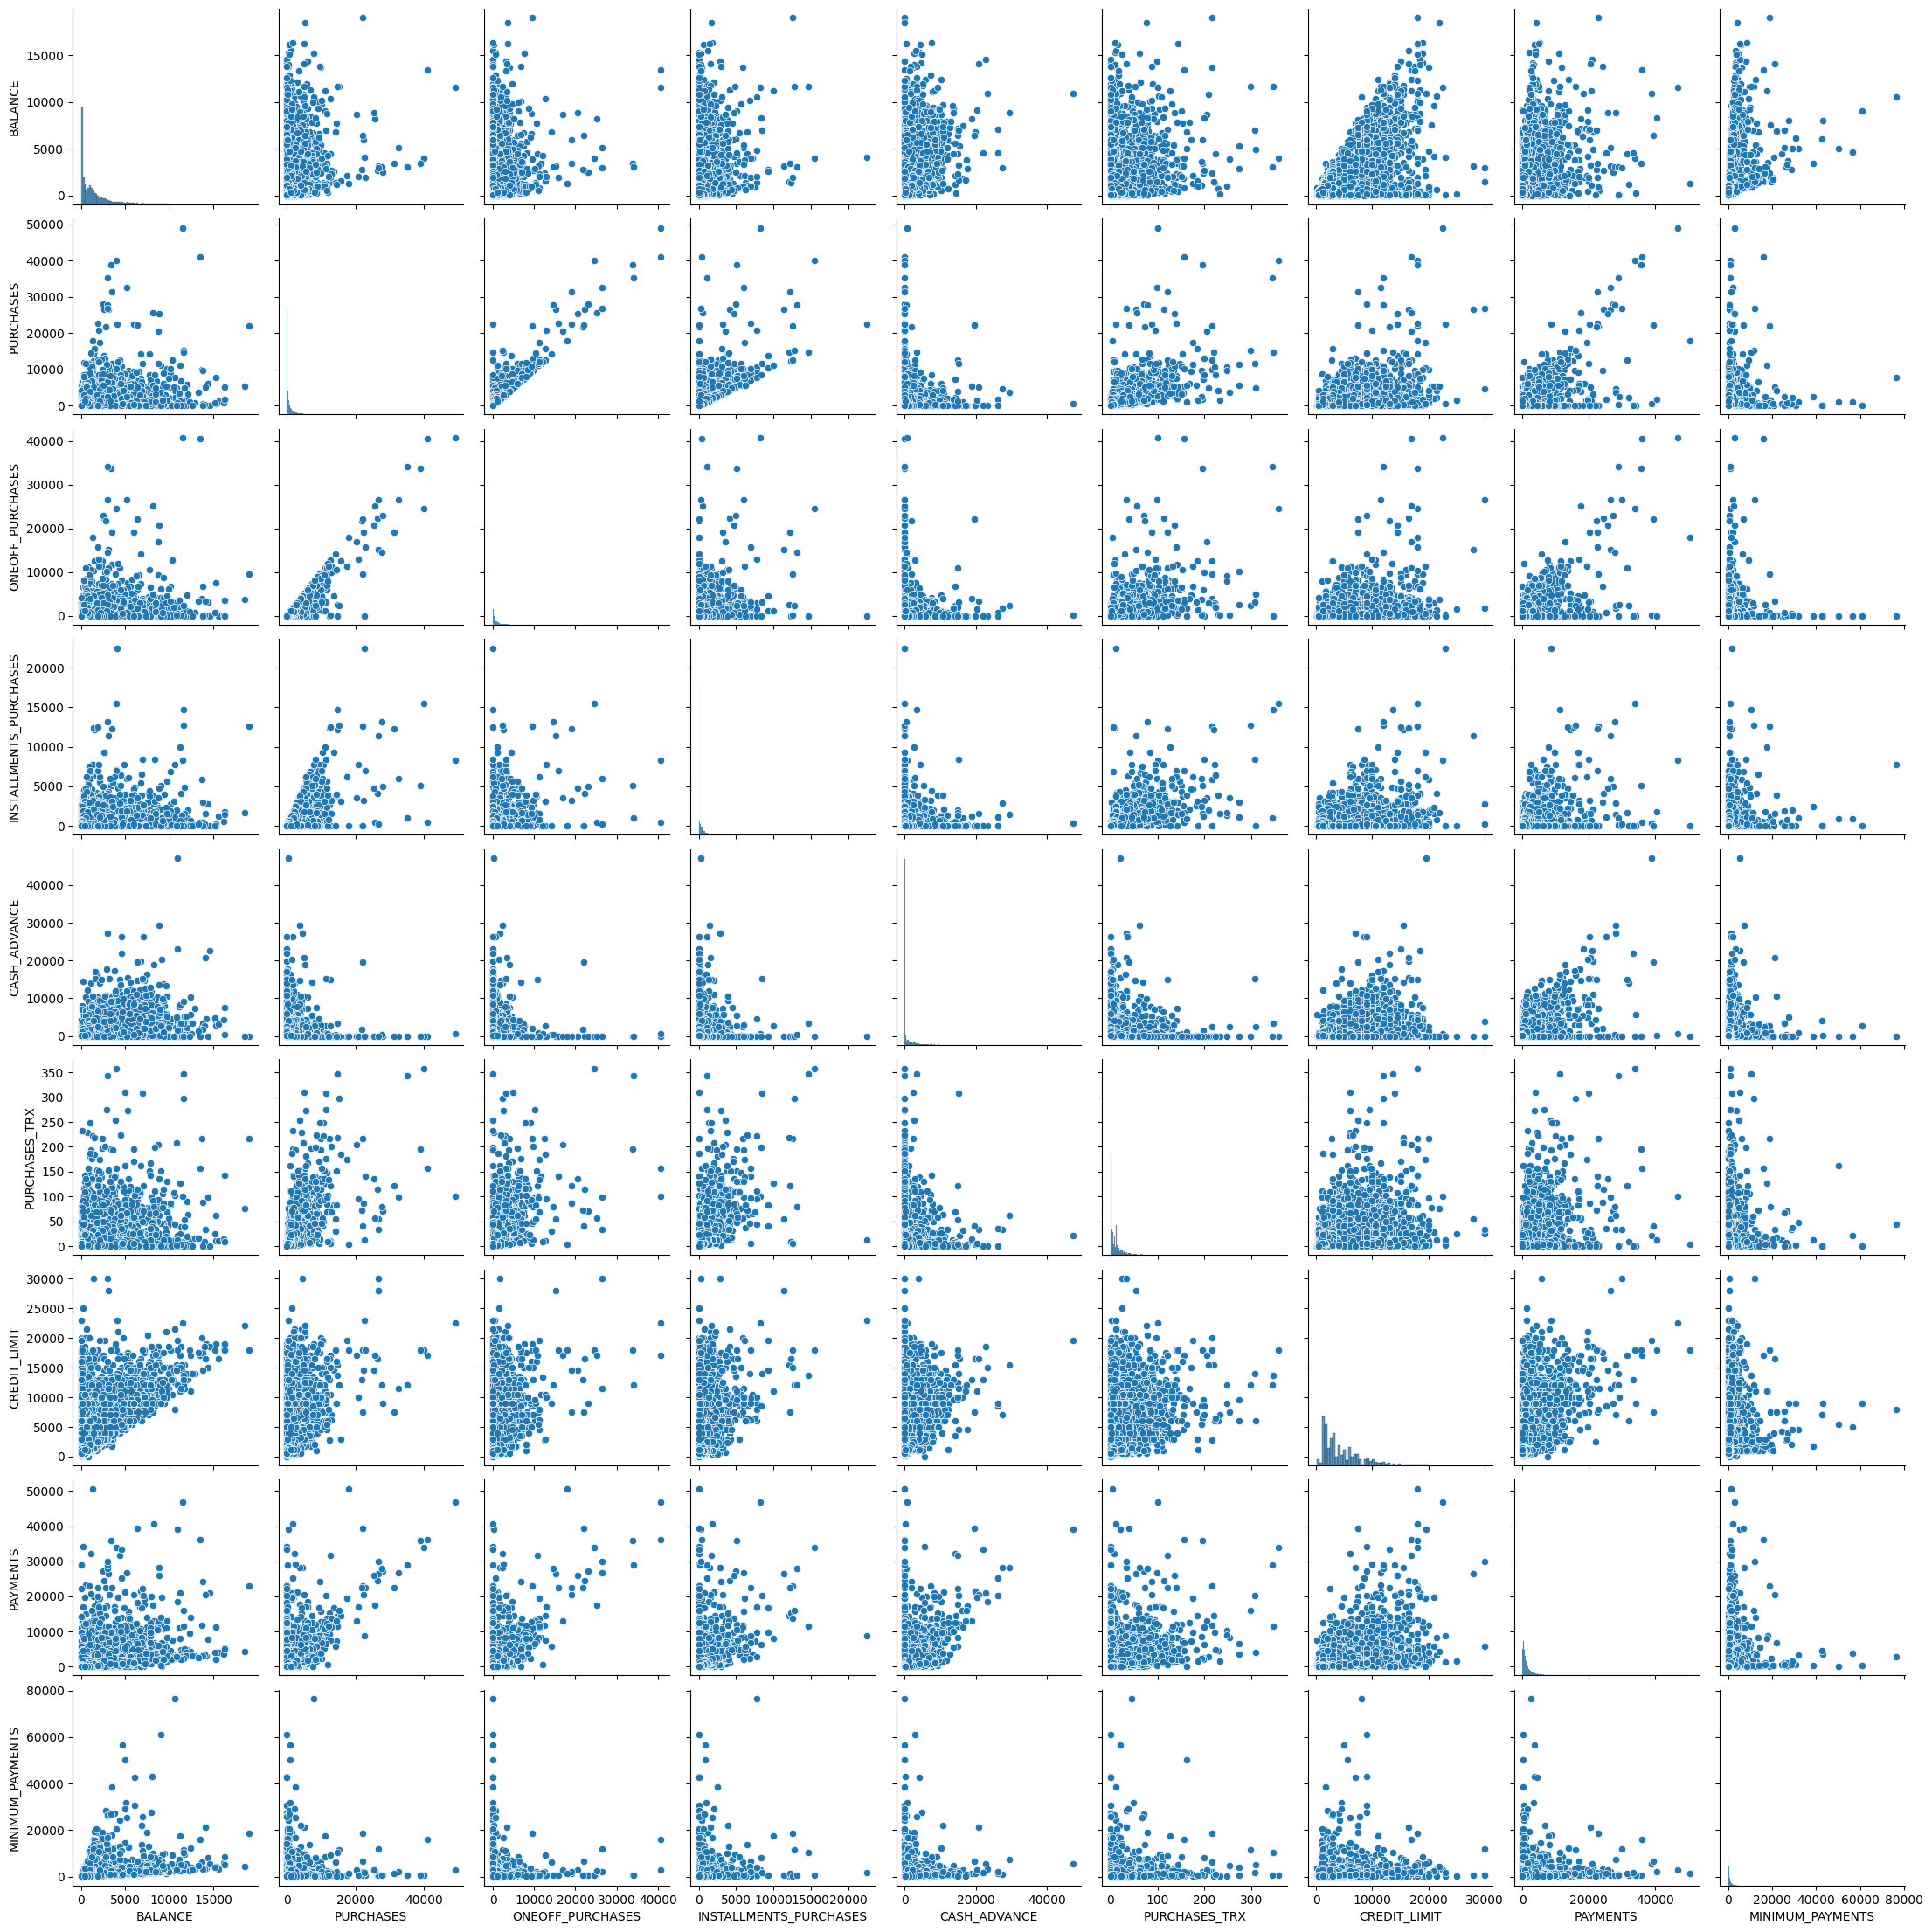

In [10]:
sns.pairplot(df[continuous_features])

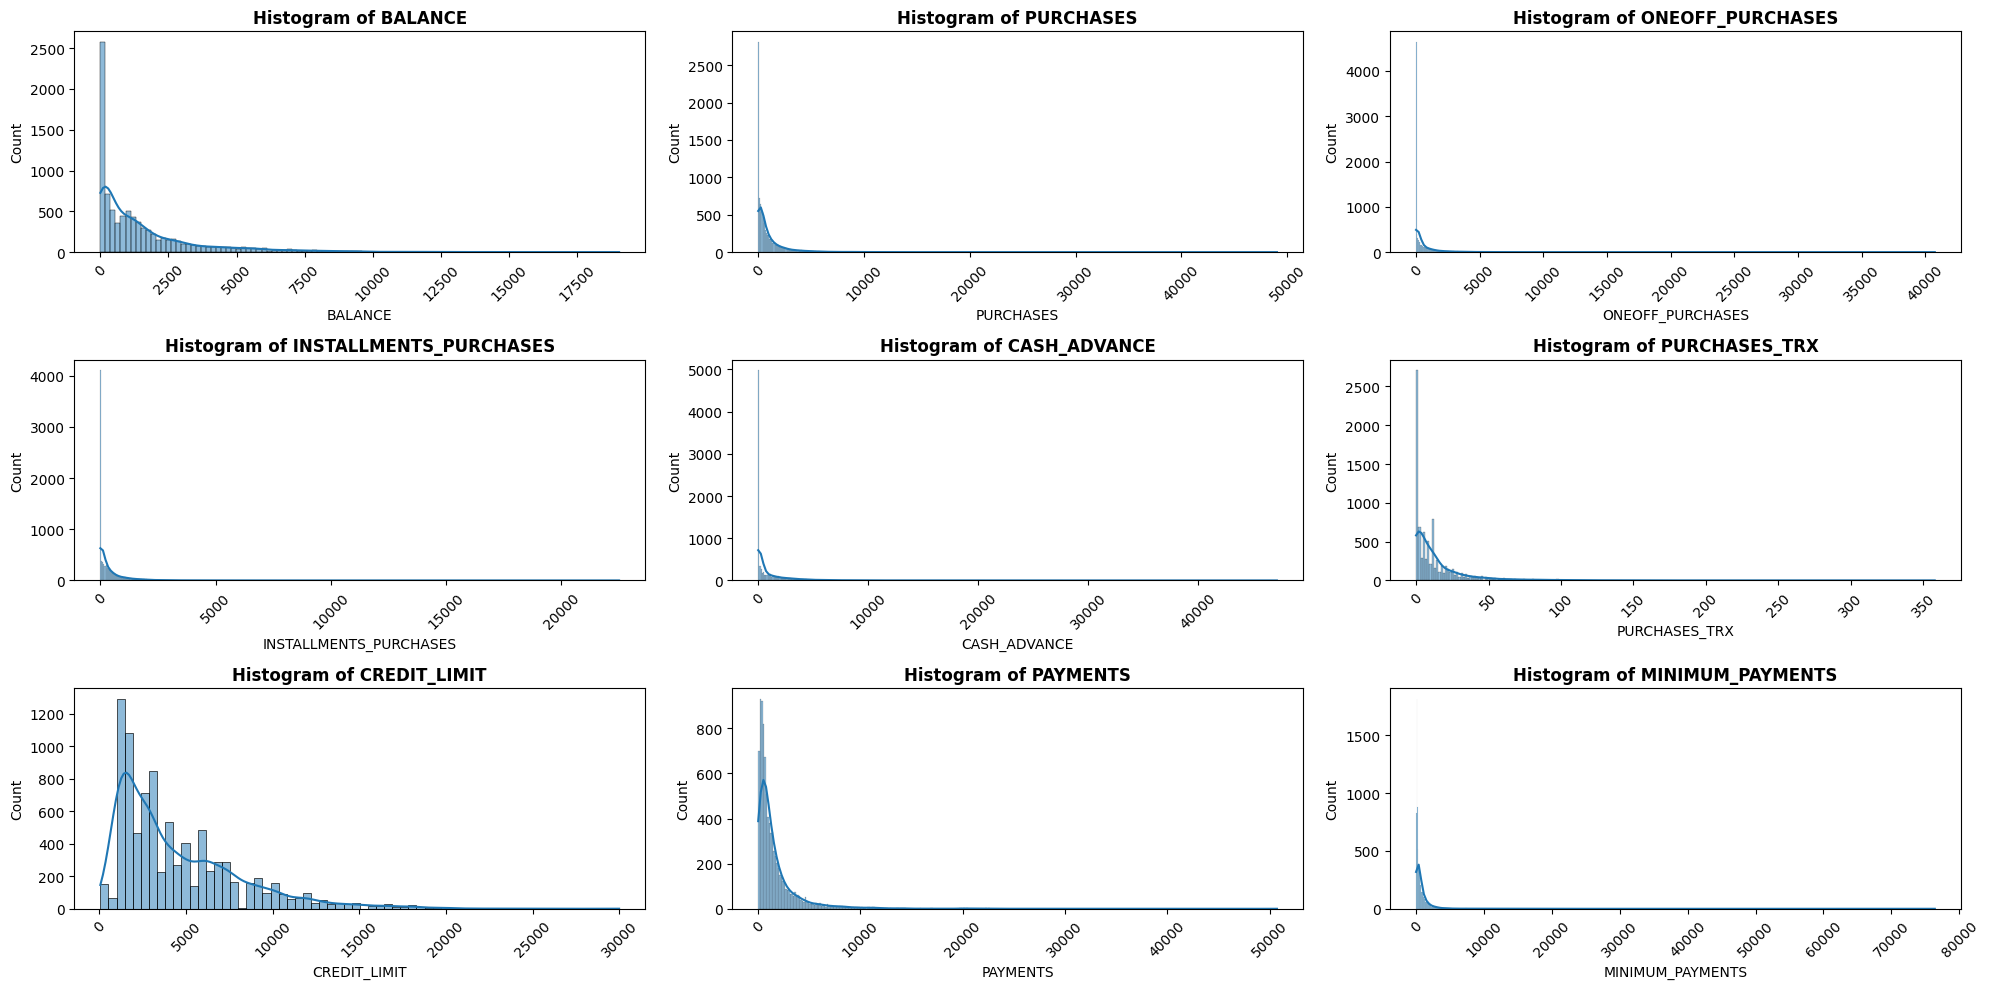

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(continuous_features):
    sns.histplot(data=df, x=feature, ax=axes[i], palette='viridis', kde=True)
    axes[i].set_title(f'Histogram of {feature}', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

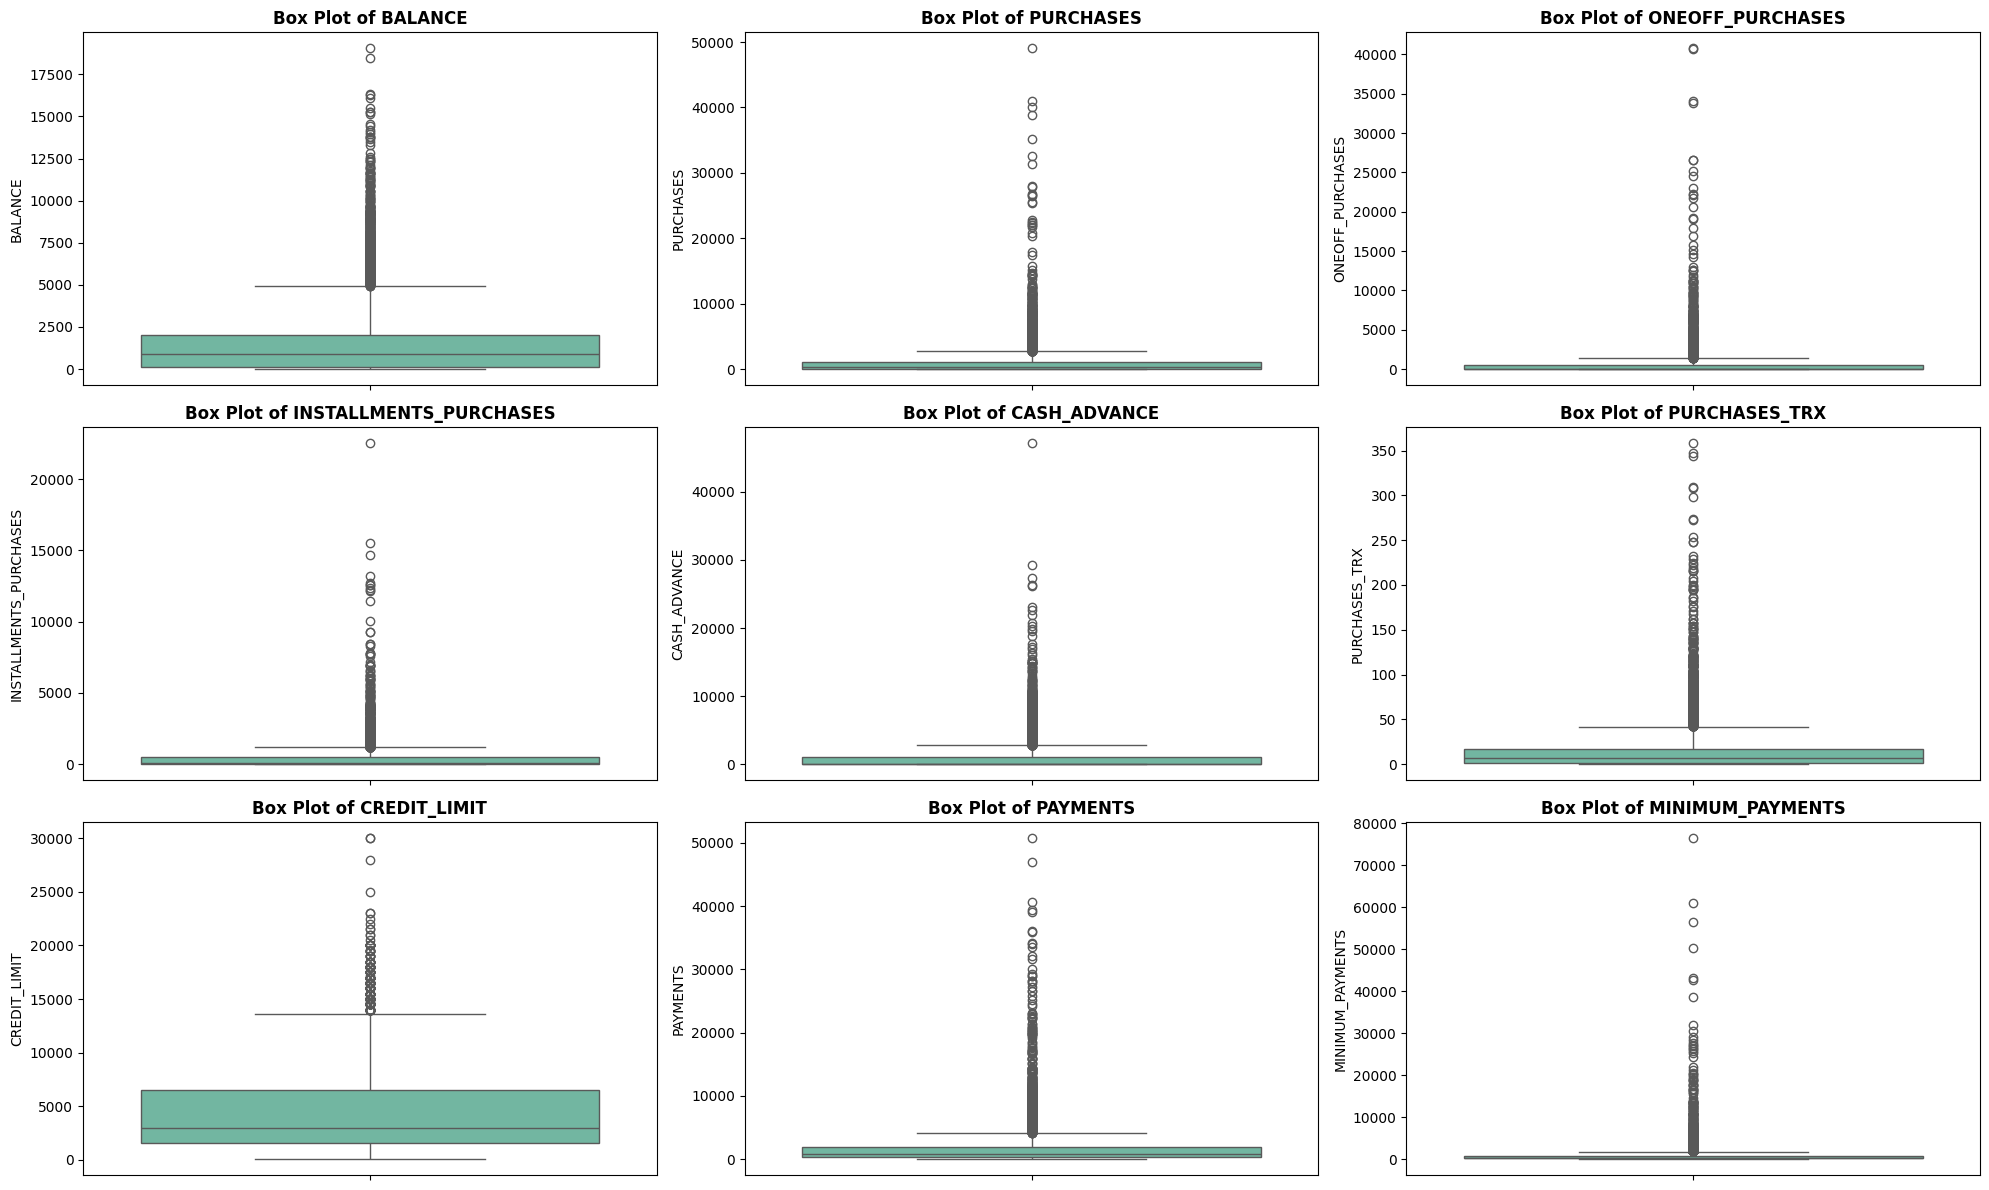

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(continuous_features):
    sns.boxplot(data=df, y=feature, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Box Plot of {feature}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(feature, fontsize=10)

plt.tight_layout()
plt.show()

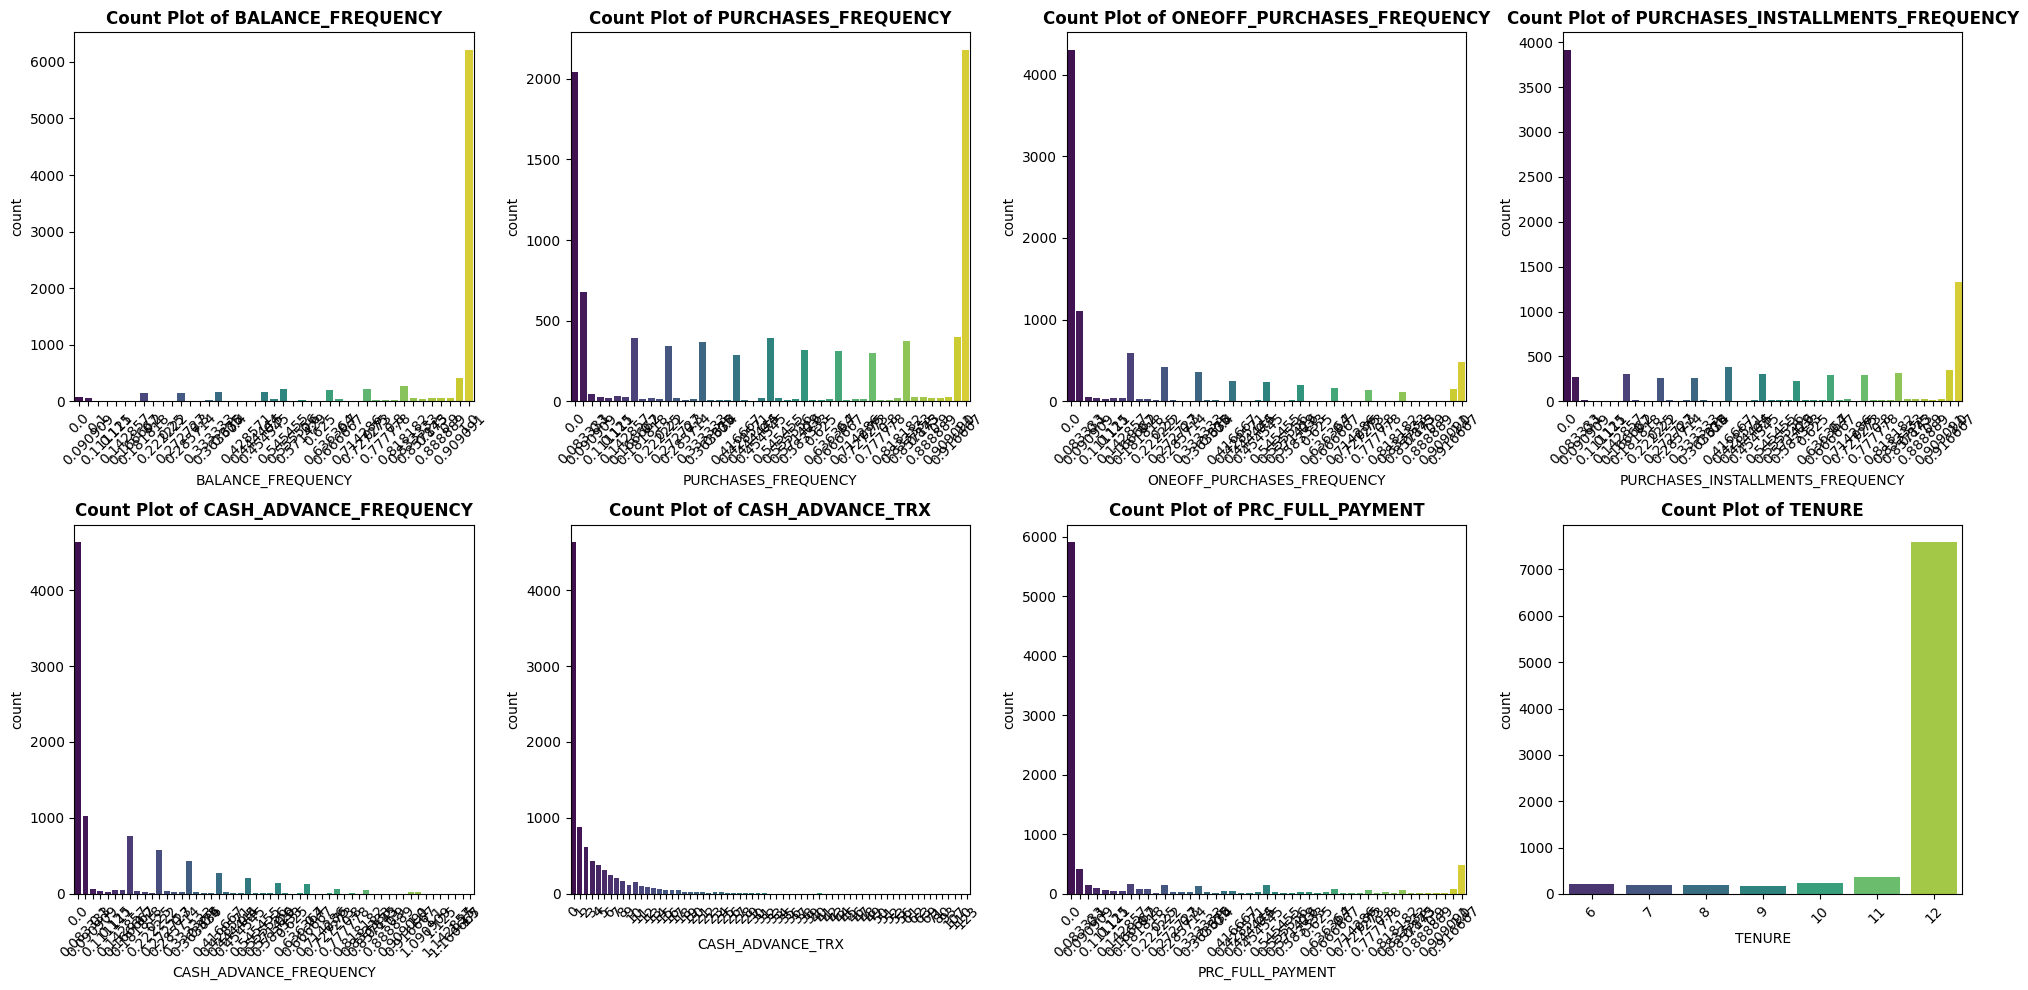

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(discrete_features):
    sns.countplot(data=df, x=feature, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Count Plot of {feature}', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Data Preprocessing

As you saw in the previous visualizations, most features are right skewed. To address this, we will apply a log transformation to these features to reduce skewness and make the data more suitable for clustering.

In [14]:
# Log Transformation
for feature in continuous_features:
    df[feature] = df[feature].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)

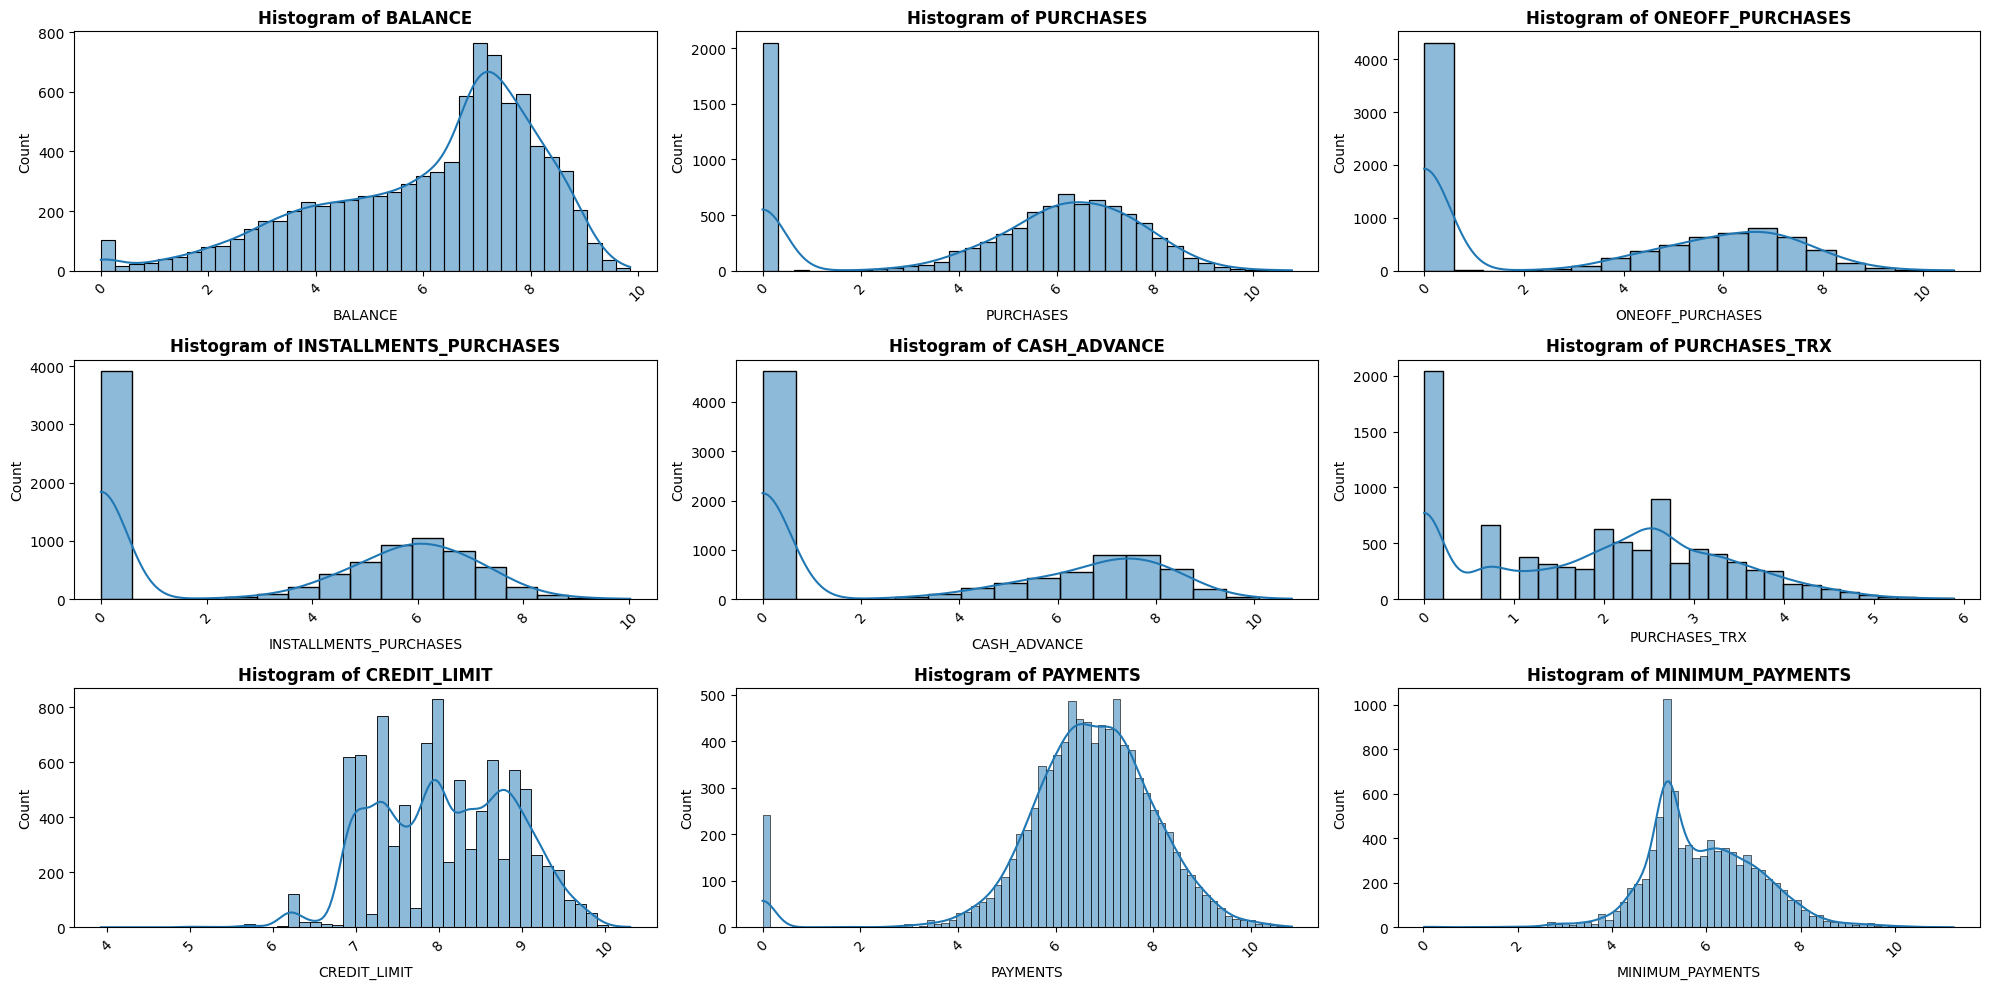

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(continuous_features):
    sns.histplot(data=df, x=feature, ax=axes[i], palette='viridis', kde=True)
    axes[i].set_title(f'Histogram of {feature}', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

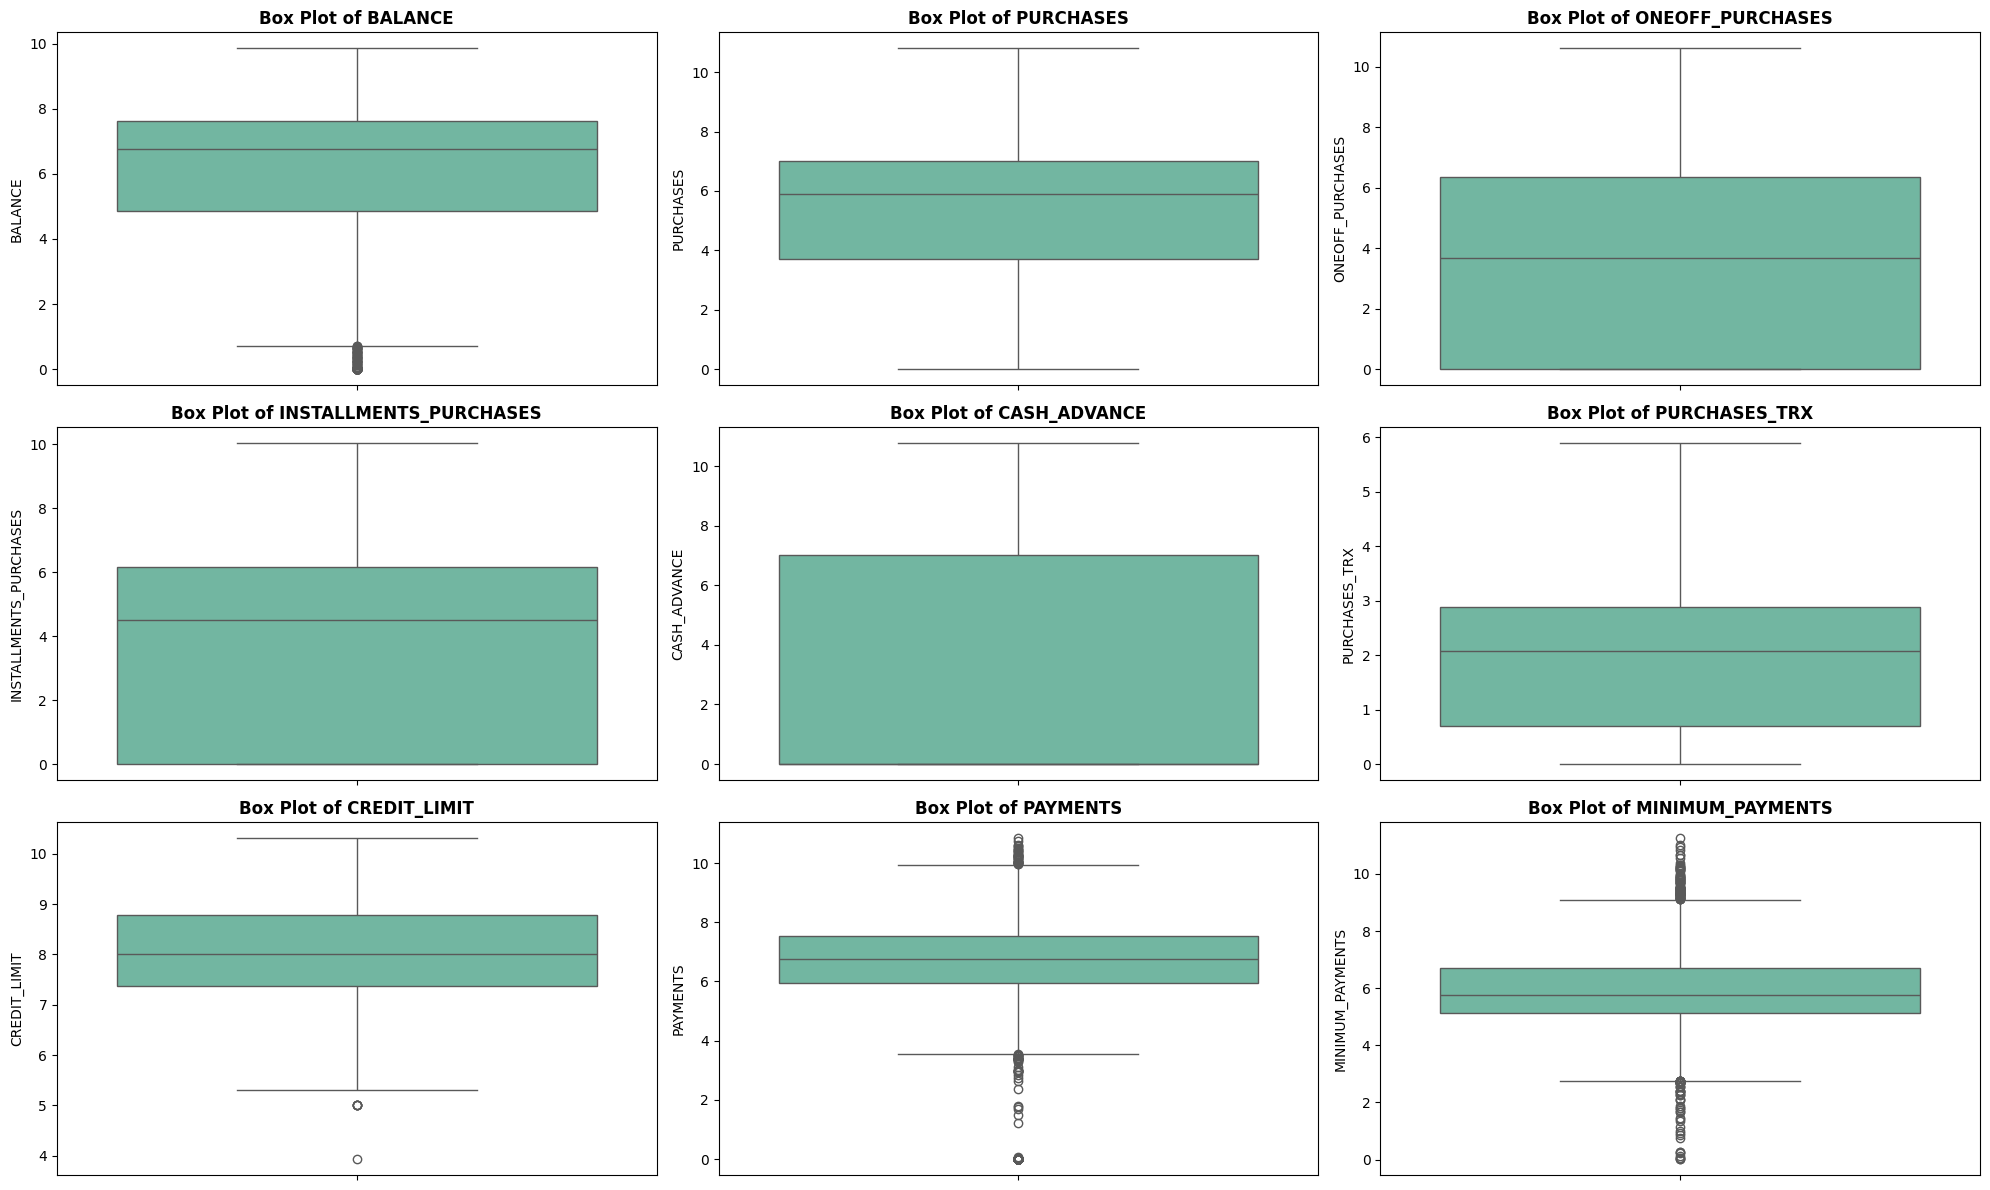

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(continuous_features):
    sns.boxplot(data=df, y=feature, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Box Plot of {feature}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(feature, fontsize=10)

plt.tight_layout()
plt.show()

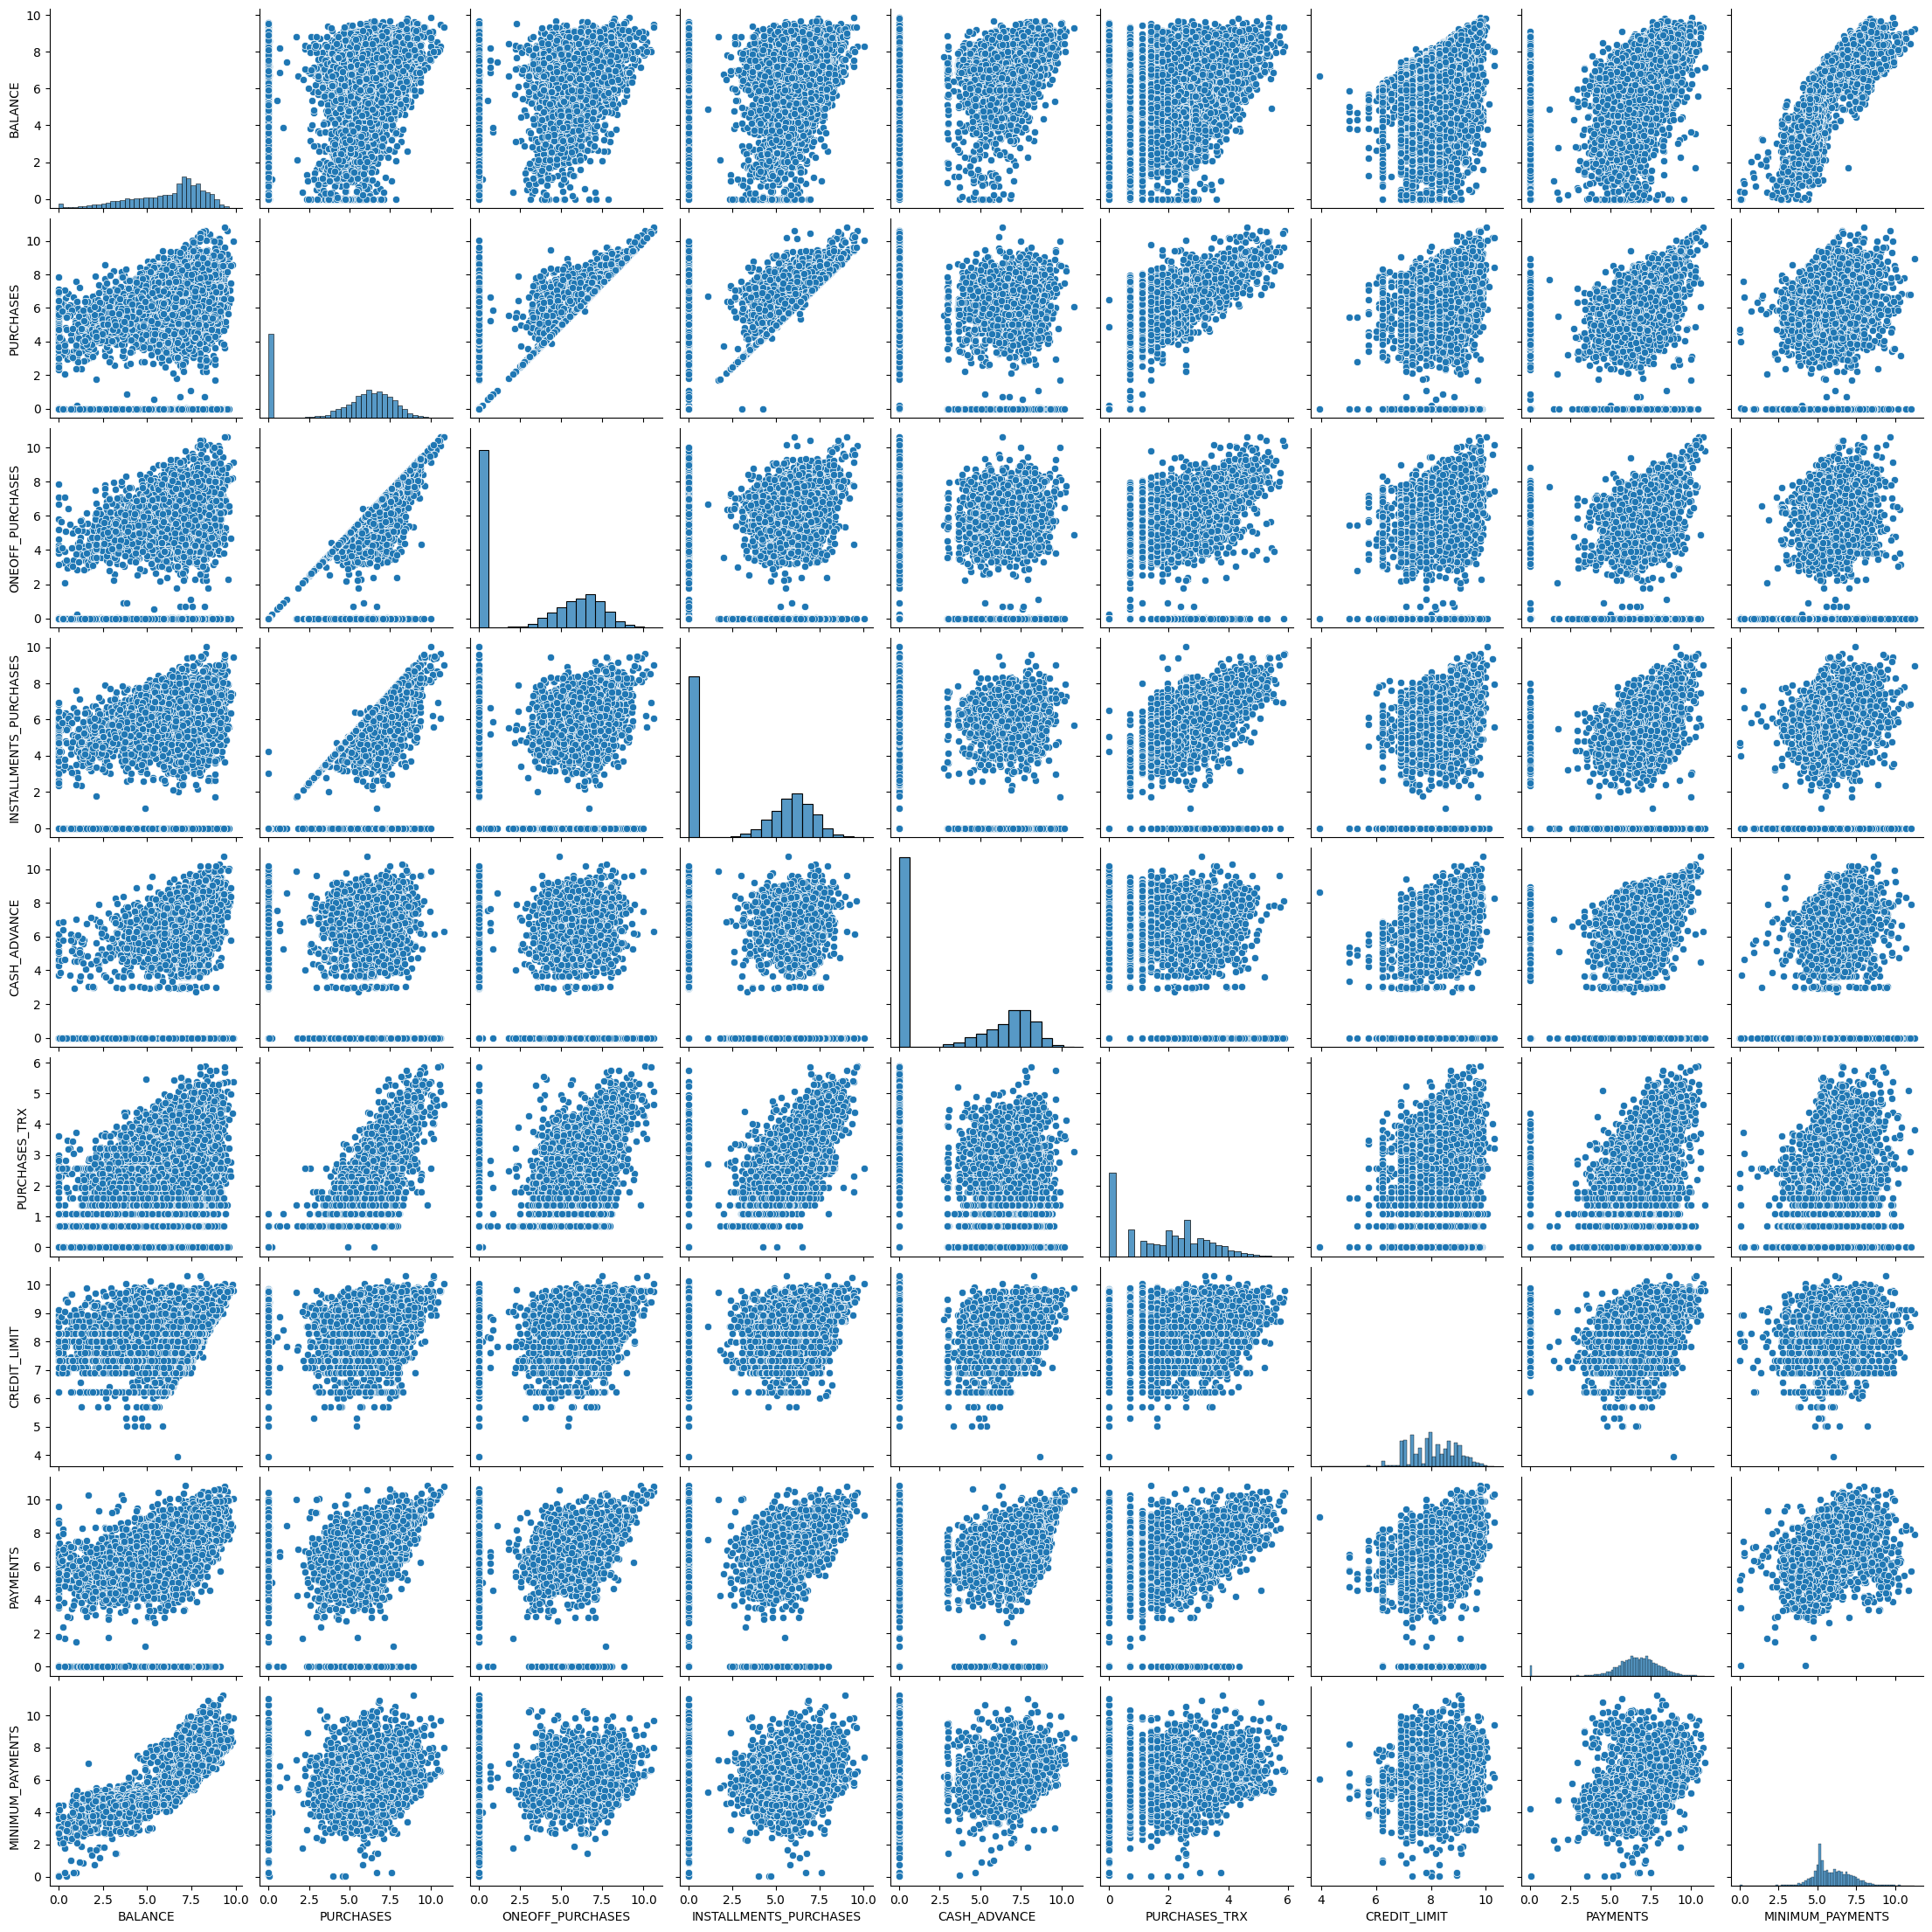

In [17]:
sns.pairplot(df[continuous_features])

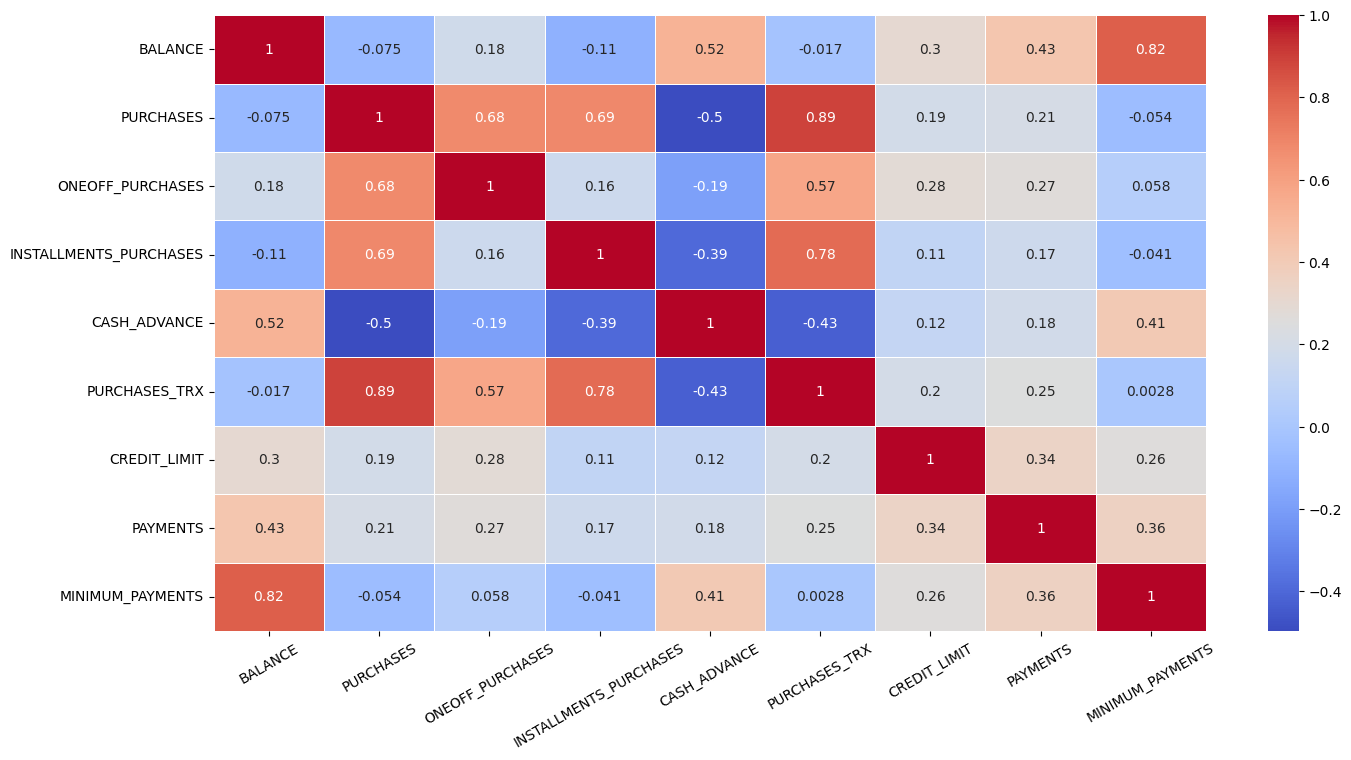

In [18]:
plt.figure(figsize=(16, 8))
sns.heatmap(df[continuous_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.xticks(rotation=30)
plt.show()

The log transformation is applied to the continuous features in the dataset, which helps in normalizing the data and showing the relationship between features more clearly.

## Null Imputation

We have identified that there are some null values `MINIMUM_PAYMENTS` and we will figure out the best way to handle them. We can impute them with zero if balance is zero, otherwise we will use **regression-based imputation**.

In [19]:
# If balance = 0 then minimum payment should be 0
df.loc[df['BALANCE'] == 0, 'MINIMUM_PAYMENTS'] = 0

In [20]:
# For the rest we will use regression-based imputation
# Prepare the data for regression
regression_data = df[df[continuous_features]['MINIMUM_PAYMENTS'].notna()]
X = regression_data.drop(columns=['MINIMUM_PAYMENTS'])
y = regression_data['MINIMUM_PAYMENTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error: 0.4868662492643959
R^2 Score: 0.7220737932533966


In [21]:
# Impute the missing values
missing_data = df[df['MINIMUM_PAYMENTS'].isna()]
missing_data_X = missing_data.drop(columns=['MINIMUM_PAYMENTS'])
missing_data['MINIMUM_PAYMENTS'] = model.predict(missing_data_X)

In [22]:
# Update the original dataframe with imputed values
df.update(missing_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   float64
 12  CREDIT_LIMI

## Data Visualization

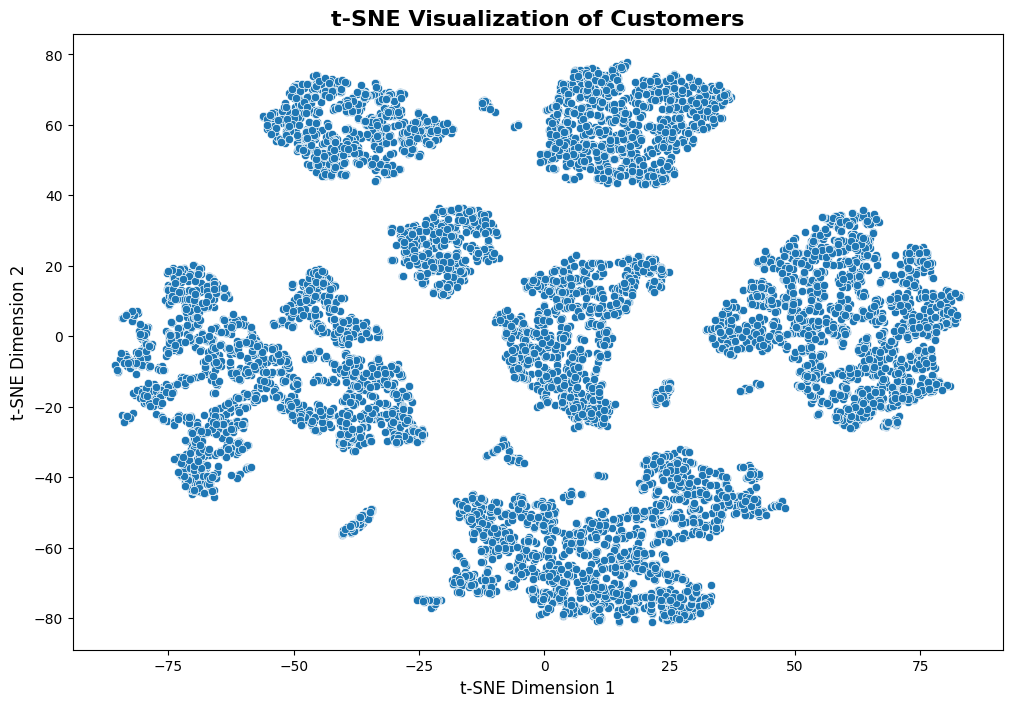

In [23]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df[continuous_features])

plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette='viridis')
plt.title('t-SNE Visualization of Customers', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.show()

## Clustering Analysis

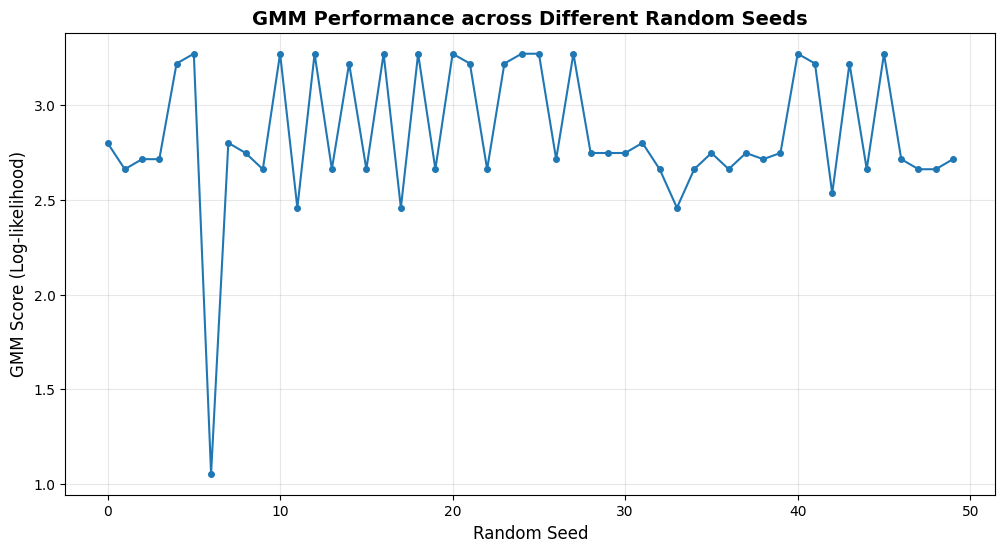

In [24]:
# Try different random seeds to find the best initialization
seeds = range(0, 50)
scores = []

for seed in seeds:
    gmm = GaussianMixture(n_components=7, covariance_type='full', random_state=seed)
    gmm.fit(df[continuous_features])
    score = gmm.score(df[continuous_features])
    scores.append(score)

# Plot the scores
plt.figure(figsize=(12, 6))
plt.plot(seeds, scores, marker='o', linestyle='-', markersize=4)
plt.xlabel('Random Seed', fontsize=12)
plt.ylabel('GMM Score (Log-likelihood)', fontsize=12)
plt.title('GMM Performance across Different Random Seeds', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

In [25]:
# Use the best seed for final clustering
best_seed = seeds[np.argmax(scores)]
print(f'Best random seed: {best_seed} with score: {max(scores):.4f}')

gmm = GaussianMixture(n_components=7, covariance_type='full', random_state=best_seed)
clusters = gmm.fit_predict(df[continuous_features])

Best random seed: 25 with score: 3.2718


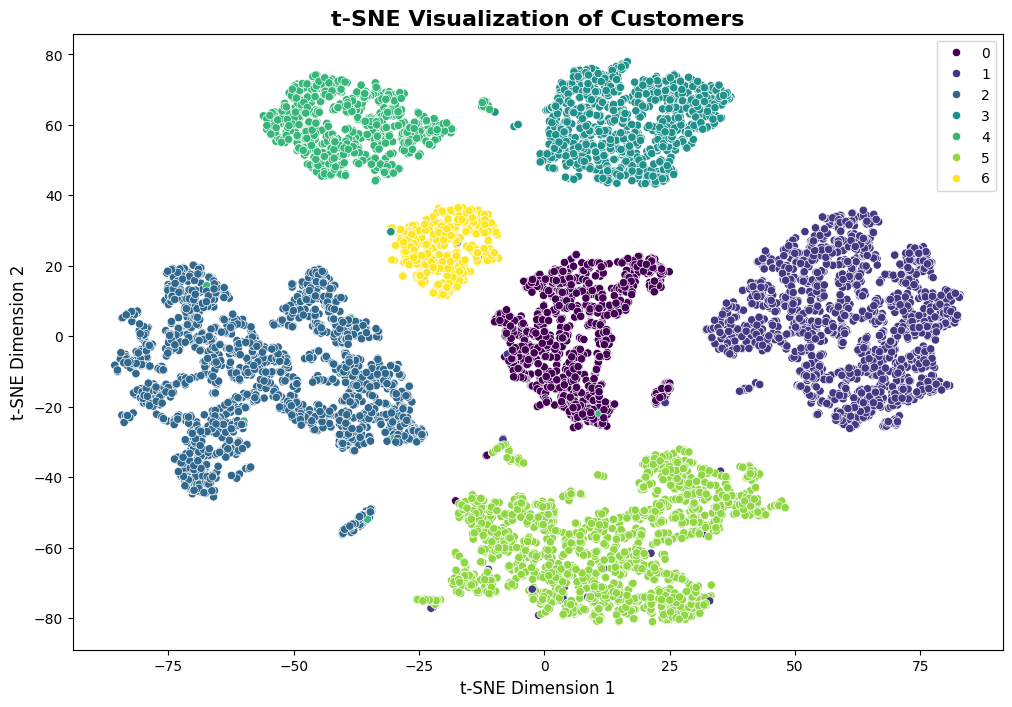

In [26]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df[continuous_features])

plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette='viridis', hue=clusters)
plt.title('t-SNE Visualization of Customers', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.show()

In [27]:
# Add cluster labels to the original dataframe
df['Cluster'] = clusters

In [ ]:
# Create figure
fig = go.Figure()

# Add traces for each feature (initially all hidden except the first)
for i, feature in enumerate(continuous_features):
    for cluster in sorted(df['Cluster'].unique()):
        cluster_data = df[df['Cluster'] == cluster][feature]
        fig.add_trace(go.Box(
            y=cluster_data,
            name=f'Cluster {cluster}',
            visible=(i == 0),  # Only first feature visible initially
            legendgroup=f'cluster_{cluster}',
            showlegend=(i == 0),  # Only show legend for first feature
        ))

# Create dropdown buttons
buttons = []
num_clusters = df['Cluster'].nunique()

for i, feature in enumerate(continuous_features):
    # Create visibility list: show traces for current feature
    visibility = [False] * len(fig.data)
    for j in range(num_clusters):
        visibility[i * num_clusters + j] = True
    
    buttons.append(dict(
        label=feature,
        method='update',
        args=[
            {'visible': visibility},
            {'title': f'Box Plot of {feature} by Cluster'}
        ]
    ))

# Update layout with dropdown menu
fig.update_layout(
    title=f'Box Plot of {continuous_features[0]} by Cluster',
    yaxis_title='Value', xaxis_title='Cluster',
    updatemenus=[dict(active=0, buttons=buttons, direction='down', 
                      showactive=True, x=0.40, xanchor='left', y=1.15, yanchor='top')],
    height=600, showlegend=True)

fig.show()

In [36]:
# Create figure with bar plots
fig = go.Figure()

# Add traces for each feature (initially all hidden except the first)
for i, feature in enumerate(continuous_features):
    cluster_means = df.groupby('Cluster')[feature].mean().sort_index()
    
    fig.add_trace(go.Bar(
        x=cluster_means.index, y=cluster_means.values, name=feature,
        visible=(i == 0),  # Only first feature visible initially
        marker=dict(color=cluster_means.index, colorscale='Viridis', showscale=(i == 0))
    ))

# Create dropdown buttons
buttons = []

for i, feature in enumerate(continuous_features):
    # Create visibility list: show trace for current feature
    visibility = [False] * len(fig.data)
    visibility[i] = True
    
    buttons.append(dict(
        label=feature,
        method='update',
        args=[
            {'visible': visibility},
            {'title': f'Mean {feature} by Cluster'}
        ]
    ))

# Update layout with dropdown menu
fig.update_layout(
    title=f'Mean {continuous_features[0]} by Cluster',
    yaxis_title='Mean Value',
    xaxis_title='Cluster',
    xaxis=dict(tickmode='linear'),
    updatemenus=[dict(active=0, buttons=buttons, direction='down', showactive=True, 
                      x=0.4, xanchor='left', y=1.15, yanchor='top')], height=600, showlegend=False)

fig.show()